Assignment 2
Perform the following operations using R/Python on the data sets:

a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles)

b) Illustrate the feature distributions using histogram.

c) Data cleaning, Data integration, Data transformation, Data model building (e.g.Classification)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# Load dataset 
df = pd.read_csv("E:/my documents/ML Clg Assignments/Assignment_2/Heart (1) - Heart (1).csv")

In [6]:
# --- a) Compute summary statistics ---
summary_stats = df.describe(include="all")
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
         Unnamed: 0         Age         Sex     ChestPain      RestBP  \
count   303.000000  303.000000  303.000000           303  303.000000   
unique         NaN         NaN         NaN             4         NaN   
top            NaN         NaN         NaN  asymptomatic         NaN   
freq           NaN         NaN         NaN           144         NaN   
mean    152.000000   54.438944    0.679868           NaN  131.689769   
std      87.612784    9.038662    0.467299           NaN   17.599748   
min       1.000000   29.000000    0.000000           NaN   94.000000   
25%      76.500000   48.000000    0.000000           NaN  120.000000   
50%     152.000000   56.000000    1.000000           NaN  130.000000   
75%     227.500000   61.000000    1.000000           NaN  140.000000   
max     303.000000   77.000000    1.000000           NaN  200.000000   

              Chol         Fbs     RestECG       MaxHR       ExAng  \
count   303.000000  303.000000  303.000000  

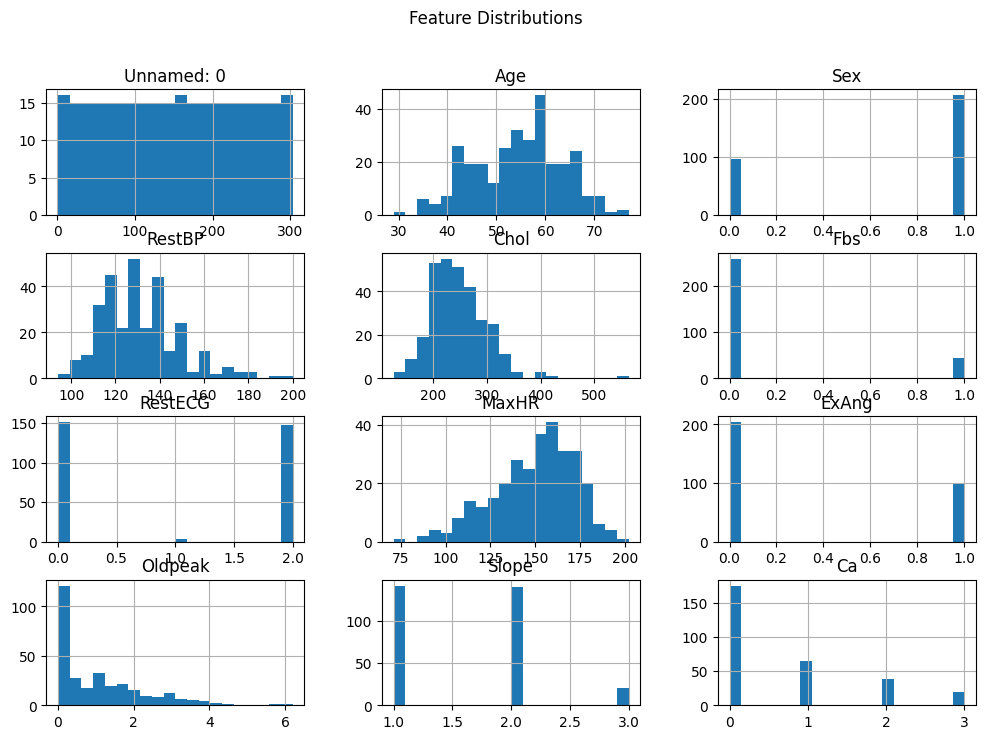

In [7]:
# --- b) Feature distributions using histograms ---
df.hist(figsize=(12, 8), bins=20, color)
plt.suptitle("Feature Distributions")

plt.show()

In [8]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [9]:
# --- c) Data Cleaning ---
# Handling missing values: Fill numeric columns with their mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = df[col].astype(str)  # Convert to string to ensure consistency
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])
    except Exception as e:
        print(f"Error encoding column {col}: {e}")

print("Data Cleaning Done!")

Data Cleaning Done!


In [10]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')


In [11]:
# Define features and target
X = df.drop(columns=["AHD"])
y = df["AHD"]
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (303, 14)
Target (y) shape: (303,)


In [12]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Model training using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [15]:
# Model Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy Score: 0.9016393442622951
